In [1]:
import sys
sys.path.insert(1, '../')  # to load from any submodule in the repo

import utils.dpcr_utils as utils
from utils.dpcr_generator import getPaths

import numpy as np
import scipy as sp
import scipy.stats
import scipy.optimize
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt
import scipy.spatial
import time
import itertools
import torch

device = torch.device("cuda")

print('Using GPU : ' + str(torch.cuda.current_device()) + ' from ' + str(torch.cuda.device_count()) + ' devices')

from matplotlib import rcParams
rcParams['font.family'] = 'Century Schoolbook'
rcParams['font.cursive'] = 'Century Schoolbook'
rcParams['font.size'] = '19'

rcParams['text.usetex'] = True 
rcParams['text.latex.preamble'] = [r'\usepackage{fouriernc}']

colors = ['steelblue', 'darksalmon', 'cadetblue', 'slateblue']

Using GPU : 0 from 1 devices


In [2]:
dataset = 'multi_faces'

start = time.time()

data = None
with open('../' + getPaths()[dataset]['base'] + '/' + dataset + '_train_data', 'rb') as file:
    data = torch.load(file)
    
print ("Total Time: ", time.time() - start)

Total Time:  21.871000289916992


In [ ]:
print ("Bins:", len(data["train_bins"]))

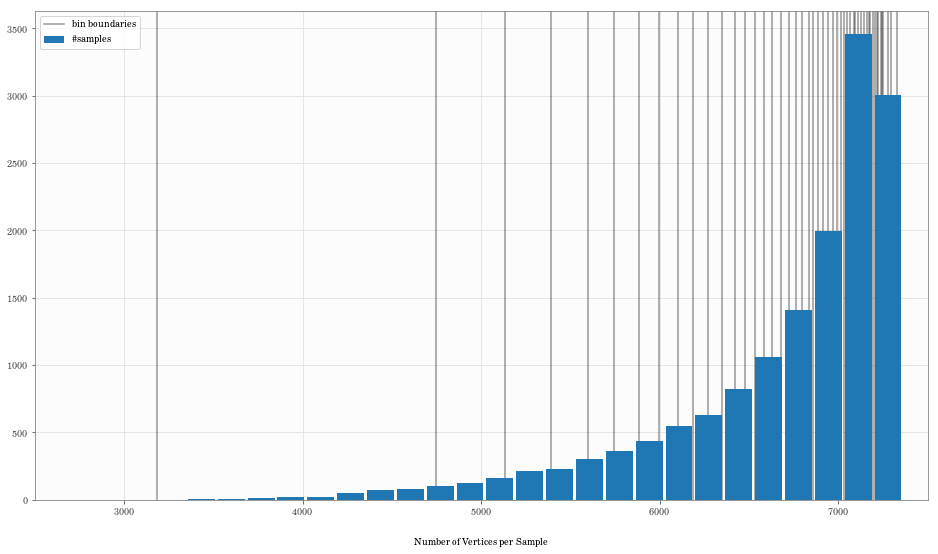

In [5]:
plt.figure(figsize=(16,9))

ax = plt.axes()

plt.setp(ax.spines.values(), color=3 * [0.5])
ax.set_facecolor(3 * [0.99])
ax.tick_params(axis='x', colors=3 * [0.3])
ax.tick_params(axis='y', colors=3 * [0.3])

ax.set_xlim(2500,7500)
ax.set_xlabel(r'Number of Vertices per Sample', labelpad=20)

for bin in data["train_bins"]:
    ax.axvline(x=bin.size(1), color='black', alpha=0.4, zorder=1)
    
ax.hist(data["sample_stats"]["sample_sizes"], bins=25, rwidth=0.9, label='\#samples', zorder=2)
ax.axvline(x=-1, label='bin boundaries', color='black', alpha=0.4)

ax.set_axisbelow(True)
ax.grid(color=3 * [0.88])
ax.legend()

#plt.savefig('binning.pdf')